In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#Linear Regression
#Linear regression for a set of x array and given equation y
import numpy as np
from sklearn.linear_model import LinearRegression

#Representation of an array in numpy
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# y = 5 * x_0 + 6 * x_1 + 3
#x_0 is the first element of each pair; #x_1 is the second element
#np.dot() is the product of two arrays
#Note 5 and 6 are the coefficients for the equation y
y = np.dot(X, np.array([3, 7])) + 3
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print("\n")


#Estimate coefficiencts for the linear regression problem.
#First coefficient is for x_0, and second is for x_1
print(reg.coef_)
print("\n")

#Intercept of the linear regression problem
print(reg.intercept_)
print("\n")

#Predict the y value for [3,5] - x_0 is 3, and x_1 is 5
print(reg.predict(np.array([[3, 5]])))
print("\n")



1.0


[3. 7.]


3.0000000000000036


[47.]




   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


      BMI
291  28.1
421  27.9
438  24.9
219  22.5
265  24.0
..    ...
154  28.3
2    30.5
244  31.4
380  28.8
308  22.1

[353 rows x 1 columns]


       Y
291  248
421  212
438  104
219  185
265   74
..   ...
154  197
2    141
244  187
380   52
308  114

[353 rows x 1 columns]


      BMI
250  31.6
359  26.9
405  37.8
331  24.0
95   21.0
..    ...
9    30.0
292  24.3
113  27.7
372  24.2
220  22.7

[89 rows x 1 columns]


The predicted Y value for BMI = 60 is:  [[499.17767028]]
Coefficients: 
 [[10.40255218]]


Mean squared error:  4102.464088961864
Coefficient of determination:  0.3043079879323993


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


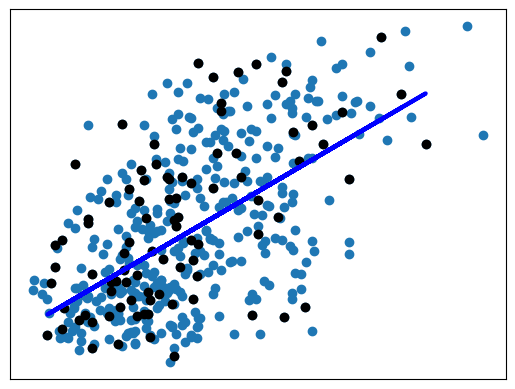

In [7]:
#linear regression using a dataset
#plot a 2-D linear regression plot for dataset in diabetes.txt
#One Feature and 2-D plot for building a linear regrtession model. You could use the linear regression model for prediction.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#load dataset and remove white spaces
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Week 8 Datasets/diabetes.txt', delimiter="\s+")
print(dataset.head())
print("\n")

#Use only 1 feature - AGE to predict the target Y
diabetes_x = dataset[['BMI']]
diabetes_y = dataset[['Y']]

#The scatterplot evidence that seemingly there is a trend
plt.scatter(diabetes_x, diabetes_y)

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(diabetes_x, diabetes_y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)


#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets and reshape 1D arrays
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred2 = regr.predict([[60]])
print("\n")
print("The predicted Y value for BMI = 60 is: ", y_pred2)

# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))

 # Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()





In [12]:
#2.	Multiple Linear Regression
#In this example, we are going to use all columns (except Sex) to predict the Y value in diabetes.txt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#load dataset and remove white spaces
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Week 8 Datasets/diabetes.txt', delimiter="\s+")
print(dataset.head())
print("\n")

#Use only 1 feature - AGE to predict the target Y
diabetes_x = dataset[['BMI', 'BP' , 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
diabetes_y = dataset[['Y']]

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(diabetes_x, diabetes_y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)

#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

#Make prediction for the following:
pBMI = 30
pBP = 100
pS1 = 160
pS2 = 55
pS3 = 45
pS4 = 4.0
pS5 = 4.5
pS6 = 88
print("\n")
print ('Predicted Y value: ', regr.predict([[pBMI, pBP, pS1, pS2, pS3, pS4, pS5, pS6]]))
print("\n")

# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))


#Use statsmodel for model summary
diabetes_x = sm.add_constant(diabetes_x)
model = sm.OLS(diabetes_y, diabetes_x).fit()
predictions = model.predict(diabetes_x)
print_model = model.summary()
print(print_model)




   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


      BMI     BP   S1     S2    S3    S4      S5   S6
307  23.5   96.0  207  138.2  42.0  5.00  4.8978  111
288  24.8  101.0  221  151.4  60.0  4.00  3.8712   87
86   19.4   83.0  152  105.8  39.0  4.00  3.5835   83
24   29.7   88.0  167  103.4  48.0  4.00  4.3567   78
99   20.4   98.0  209  139.4  46.0  5.00  4.7707   78
..    ...    ...  ...    ...   ...   ...     ...  ...
70   19.9   91.0  189  109.6  69.0  3.00  3.9512  101
298  22.9   81.0  123   67.2  41.0  3.00  4.3041   88
54   28.7   97.0  204  126.8  64.0  3.00  4.1897   93
81   24.3   86.0  197  133.6  44.0  5.00  4.5747   91
259  23.0  107

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The model
Based on Statsmodel
Y = -362.2533 + 6.0121*BMI + 0.9241*BP –0.9733*S1 + 0.6448*S2 + 0.4993*S3 + 4.6820*S4 + 68.4130*S5 + 0.1813*S6

R-squared value is 0.500
Adjusted R-squared value is 0.491

F-Statistics
P value < 0.05 (95% confidence level) and the specified model is significantly different from the base model.


In [14]:
#Data Visualisation for Multiple Regression – use seaborn

#Multiple Linear Regression Plot, prediction model, and the visual plot
import seaborn as sns
import pandas as pd

sns.set_style()
# Load the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Week 8 Datasets/diabetes.txt', delimiter="\s+")
dataset2 = dataset.drop(columns=['SEX'])
print(dataset.head())

# Plot BMI and Y by Sex
g = sns.lmplot(
    data=dataset,
    x="BMI", y="Y", hue="SEX",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("BMI", "Y")

#Pairwise plot by SEX
g = sns.PairGrid(dataset, hue = "SEX")
g.map(sns.scatterplot)


#Pairwise plot
g = sns.PairGrid(dataset2)
g.map(sns.scatterplot)



Output hidden; open in https://colab.research.google.com to view.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


       sepal_length  sepal_width  petal_lengt

<ipython-input-20-51cab4676d79>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=dataset, palette='hls')


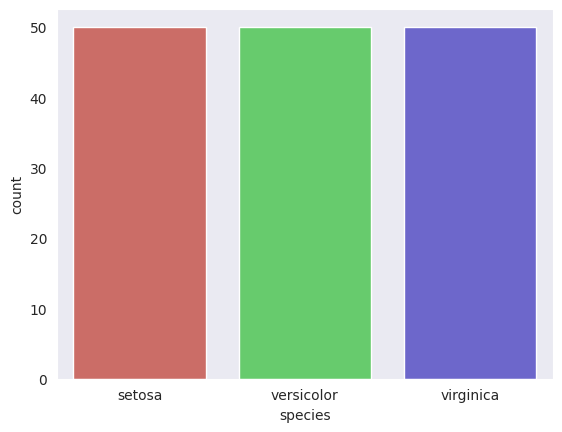



     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


If the input values for sepal length and width are 5.8 and 3.05, then      the predicted species is  ['versicolor']
If the input values for sepal length and width are 5.0 and 3.6, then      the predicted species is  ['setosa']
If the input values for sepal length and width are 5.8 and 3.05, then      the prediction probabilities for setosa, versicolor, and virginica are:  [[0.14370828 0.53415188 0.32213984]]
If the input values for sepal length and width are 5.0 and 3.6, then      the prediction probabilities for setosa, versicolor, and virginica are:  [[0.96263927 0.0289769  0.00838382]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


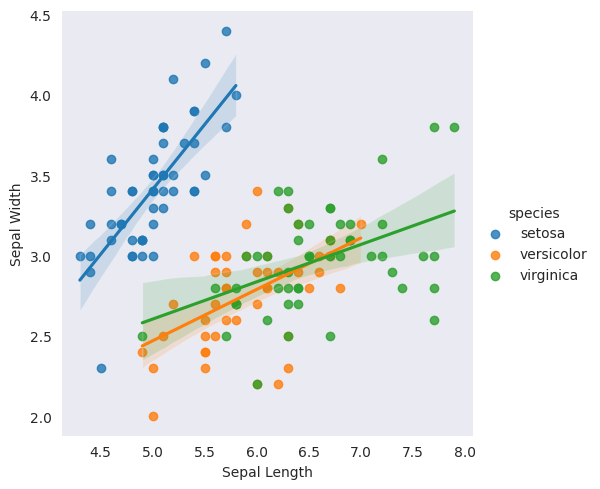

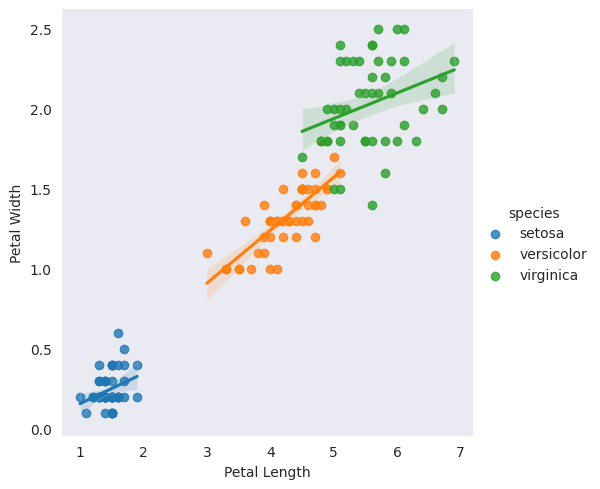

In [20]:
#logistic regression
#The first example is employing logistic regression as a classifier for three different species of irises.

#Logistic regression classifier
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

#Load dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Week 8 Datasets/iris.txt', delimiter = ',')
print(dataset.head())
print("\n")

#Explore the dataset
print(dataset.info())
print("\n")

#Any missing data
print(dataset.isnull().sum())
print("\n")

#Level 1 Descriptive Statistics
print(dataset.describe())
print("\n")

#Visualisation explore each feature wrt species
#Count how many records with species = setosa, versicolor, virginica (for the target variable)
print(dataset['species'].value_counts())
print("\n")

#sns palette https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_style('dark')
sns.countplot(x='species', data=dataset, palette='hls')
plt.show()

#Plot multiple graphs for sepal length against sepal width for all the 3 species of irises
g = sns.lmplot(
    data=dataset,
    x="sepal_length", y="sepal_width", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal Length", "Sepal Width")

#Plot multiple graphs for petal length against petal width for all the 3 species of irises
g = sns.lmplot(
    data=dataset,
    x="petal_length", y="petal_width", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Petal Length", "Petal Width")

#Logistic Regression 1 - We shall only use first two features
X = dataset.iloc[:, 0:2]
#This is the same as column 0 and 1 => X = dataset[['sepal_width', 'sepal_length']]
Y = dataset['species']
print("\n")
print(X)
print("\n")

logreg = LogisticRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
model = logreg.fit(X, Y)

#Use the logistic Model to Predict the species given the sepal lenths and widths
Xnew = [[5.8,3.05]]
ynew = model.predict(Xnew)
print('If the input values for sepal length and width are 5.8 and 3.05, then \
     the predicted species is ', ynew)

Xnew2 = [[5.0,3.6]]

ynew2 = model.predict(Xnew2)
print('If the input values for sepal length and width are 5.0 and 3.6, then \
     the predicted species is ', ynew2)

 #Probability prediction - the probability an instance in a given species
Xnew3 = [[5.8,3.05]]
ynew3 = model.predict_proba(Xnew3)
print('If the input values for sepal length and width are 5.8 and 3.05, then \
     the prediction probabilities for setosa, versicolor, and virginica are: ', ynew3)

Xnew4 = [[5.0,3.6]]
ynew4 = model.predict_proba(Xnew4)
print('If the input values for sepal length and width are 5.0 and 3.6, then \
     the prediction probabilities for setosa, versicolor, and virginica are: ', ynew4)

 #Repeat logistic regression for petal length and petal width
#Repeat the logistic regression for the sepal and petal length and width





   pregNo  glucose  bp  skin  insulin   bmi  pedigree  age  class
0       6      148  72    35        0  33.6     0.627   50      1
1       1       85  66    29        0  26.6     0.351   31      0
2       8      183  64     0        0  23.3     0.672   32      1
3       1       89  66    23       94  28.1     0.167   21      0
4       0      137  40    35      168  43.1     2.288   33      1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregNo    768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


pregNo     

<ipython-input-26-d032c54a1bc5>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=dataset, palette='Set2')


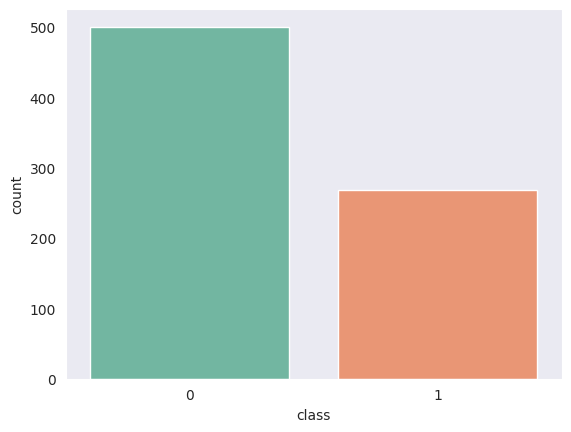

3.298 4.865671641791045




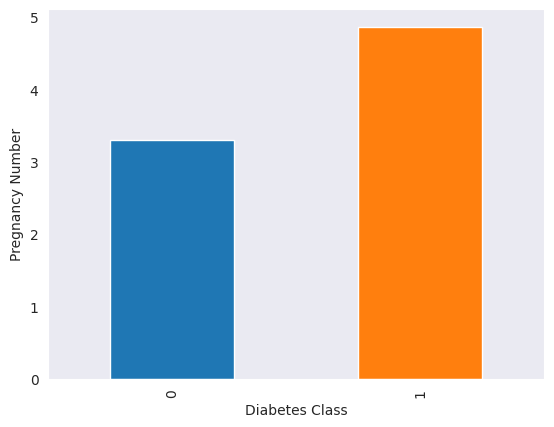



X is       pregNo  glucose  bp  skin  insulin   bmi  pedigree  age
0         6      148  72    35        0  33.6     0.627   50
1         1       85  66    29        0  26.6     0.351   31
2         8      183  64     0        0  23.3     0.672   32
3         1       89  66    23       94  28.1     0.167   21
4         0      137  40    35      168  43.1     2.288   33
..      ...      ...  ..   ...      ...   ...       ...  ...
763      10      101  76    48      180  32.9     0.171   63
764       2      122  70    27        0  36.8     0.340   27
765       5      121  72    23      112  26.2     0.245   30
766       1      126  60     0        0  30.1     0.349   47
767       1       93  70    31        0  30.4     0.315   23

[768 rows x 8 columns]
Matrix: TN[0,0]; FP[0.1]; FN[1,0]; TP[1,1] 
[[117  13]
 [ 26  36]]


model score: 0.797
Accuracy: 0.796875
Precision: 0.7346938775510204
Recall: 0.5806451612903226


First AUC value is  0.7403225806451613


Second AUC value is  0.740322

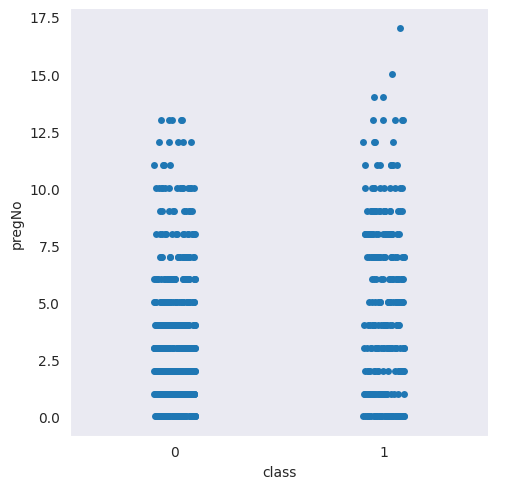

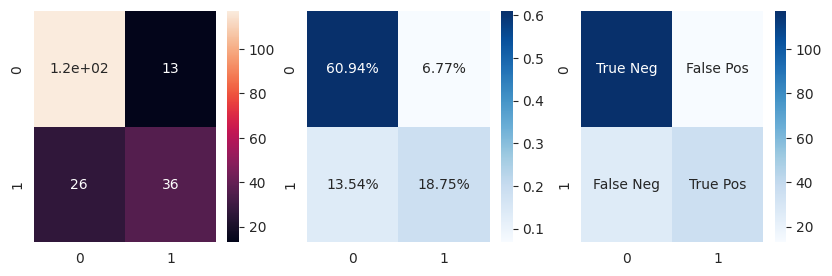

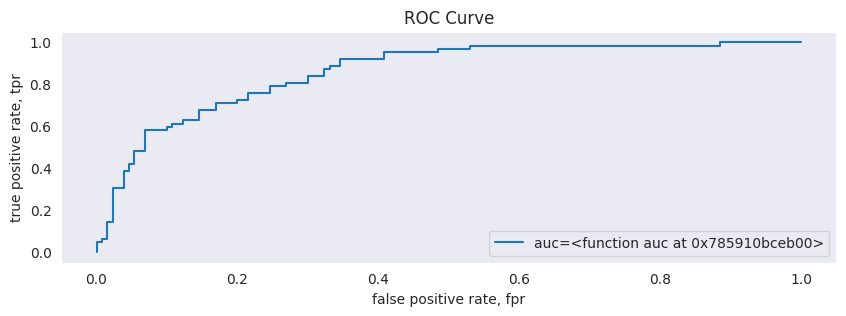

In [26]:
#predict the class of diabetes

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Load the dataset
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Week 8 Datasets/pima-indians-diabetes.xlsx')
print(dataset.head())
print("\n")

#Explore the dataset
print(dataset.info())
print("\n")

#check the number of missing data
print(dataset.isnull().sum())
print("\n")

#Level 1 Descriptive Statistical Analysis
print(dataset.describe())
print("\n")

#Count how many records with class =0 and class=1 (for the target variable)
print(dataset['class'].value_counts())
print("\n")

#sns palette https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_style('dark')
sns.countplot(x='class', data=dataset, palette='Set2')
plt.show()

#if you want to save the image as a png file
plt.savefig('count_plot2.png')

#Data Exploration 1 - Means We would like to explore the means of all numeric
#columns wrt to column class (class = 0, or 1)
#For predictor selection
mPregNo1, mPregNo2 = dataset.groupby('class')['pregNo'].mean()
print(mPregNo1, mPregNo2)
print("\n")

#Different color for different bars color=['C0', 'C1', 'C2', 'C3', 'C4']
figure = dataset.groupby('class')['pregNo'].mean().plot(kind='bar', color = ['C0', 'C1'])
plt.ylabel('Pregnancy Number')
plt.xlabel('Diabetes Class')
plt.show()

#Plot to view the 'relationship' between pregnancy number and diabetes class
sns.catplot(x='class', y = 'pregNo', data = dataset)

#Selection of Predictors for the Model
#In this example, we shall choose all the independent variables as predictors
#Columns 0 to 8 (excluding 8)
X = dataset.iloc[:, 0:8]
print("\n")
print("X is ", X)
y = dataset['class']


#Split and train the dataset - training set is 75%; test set is 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# instantiate the model (using the default parameters);
#Note if you do not state the max_iter, by default it is 100
logreg = LogisticRegression(max_iter = 200)

# fit the model with data
model = logreg.fit(X_train,y_train)

#Use the model to predict y values
y_pred = model.predict(X_test)


#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Matrix: TN[0,0]; FP[0.1]; FN[1,0]; TP[1,1] ")
print(cnf_matrix)

fig, ax = plt.subplots(1,3, figsize=(10,3))

#Use seaborn for confusion matrix visualisation
sns.heatmap(cnf_matrix, annot=True, ax=ax[0])


#seaborn confusion matrix in %
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Blues', ax = ax[1])

#heatmap labels
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues', ax = ax[2])


#Model Evaluation
# Model accuracy
print("\n")
print("model score: %.3f" % model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("\n")


#Note if auc value < 0.5 then it is a bad model
auc1 = metrics.roc_auc_score(y_test, y_pred)
print("First AUC value is ", auc1)
print("\n")

fpr, tpr, threholds = metrics.roc_curve(y_test, y_pred)
auc2 = metrics.auc(fpr, tpr)
print("Second AUC value is ", auc2)
print("\n")

# Compute ROC curve and ROC area

#y_pred_proba = logreg.predict_proba(X_test)[::,1]
# predict gives either 0 or 1 as output, while
# predict_proba - gives the probability of '1'

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc3 = roc_auc_score(y_test, y_pred_proba)
auc4 = auc(fpr, tpr)
print('fpr, False Positive Rate', fpr)
print('tpr, True Positive Rate', tpr)
print("\n")
print('auc3', auc3)
print("\n")
print('auc4', auc4)
print("\n")

plt.figure(figsize=(10,3))
plt.plot(fpr,tpr, label = "auc="+str(auc))
plt.xlabel('false positive rate, fpr')
plt.ylabel('true positive rate, tpr')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()



In [29]:
#Logarithmic Regression
#Logarithmic and Exponential Transformation of Predictors

import seaborn as sns
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


# Load the dataset
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Week 8 Datasets/pima-indians-diabetes.xlsx')
print(dataset.head())
print("\n")

#Selection of Predictors for the Model
#In this example, we shall choose columns 1 and 2 variables as predictors
#Columns 1 and 2
X = dataset.iloc[:, 1:3]
#log transform X
X_trans = np.log1p(X)
X_trans2 = np.exp((X + abs(X.min()))/200)
print("\n")
print("X is ", X)
print("\n")
print("Log transformed X is ", X_trans)
y = dataset['class']

#=================Logistic Regression Using Normal Predictor Values==============
#Split and train the dataset - training set is 75%; test set is 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# instantiate the model (using the default parameters);
#Note if you do not state the max_iter, by default it is 100
logreg = LogisticRegression(max_iter = 200)

# fit the model with data
model = logreg.fit(X_train,y_train)

#Use the model to predict y values
y_pred = model.predict(X_test)

# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("\n")


#Note if auc value < 0.5 then it is a bad model
auc1 = metrics.roc_auc_score(y_test, y_pred)
print("First AUC value is ", auc1)
print("\n")

fpr, tpr, threholds = metrics.roc_curve(y_test, y_pred)
auc2 = metrics.auc(fpr, tpr)
print("Second AUC value is ", auc2)
print("\n")


#=================Logistic Regression Using Log Transformed Predictor Values=====
#Split and train the dataset - training set is 75%; test set is 25%
X_train1,X_test1,y_train1,y_test1=train_test_split(X_trans,y,test_size=0.25,random_state=0)

# instantiate the model (using the default parameters);
#Note if you do not state the max_iter, by default it is 100
logreg1 = LogisticRegression(max_iter = 200)

# fit the model with data
model1 = logreg.fit(X_train1,y_train1)

#Use the model to predict y values
y_pred1 = model.predict(X_test1)

# Model accuracy
print("\n")
print("Log Transformed Predictor Values ===============================")
print("model score: %.3f" % model.score(X_test1, y_test1))
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))
print("\n")


#Note if auc value < 0.5 then it is a bad model
auc11 = metrics.roc_auc_score(y_test1, y_pred1)
print("First AUC value is ", auc11)
print("\n")

fpr1, tpr1, threholds1 = metrics.roc_curve(y_test1, y_pred1)
auc21 = metrics.auc(fpr1, tpr1)
print("Second AUC value is ", auc21)
print("\n")


#==Logistic Regression Using Exponential Transformed Predictor Values ==========
#Split and train the dataset - training set is 75%; test set is 25%
X_train2,X_test2,y_train2,y_test2=train_test_split(X_trans2,y,test_size=0.25,random_state=0)

# instantiate the model (using the default parameters);
#Note if you do not state the max_iter, by default it is 100
logreg2 = LogisticRegression(max_iter = 200)

# fit the model with data
model2 = logreg.fit(X_train2,y_train2)

#Use the model to predict y values
y_pred2 = model.predict(X_test2)

# Model accuracy
print("\n")
print("Exponential Transformed Predictor Values ===============================")
print("model score: %.3f" % model.score(X_test2, y_test2))
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))
print("\n")


#Note if auc value < 0.5 then it is a bad model
auc12 = metrics.roc_auc_score(y_test2, y_pred2)
print("First AUC value is ", auc12)
print("\n")

fpr2, tpr2, threholds2 = metrics.roc_curve(y_test2, y_pred2)
auc22 = metrics.auc(fpr2, tpr2)
print("Second AUC value is ", auc22)
print("\n")


#Plot the confusion Matrix
# Compare the values with the normal predictor values



   pregNo  glucose  bp  skin  insulin   bmi  pedigree  age  class
0       6      148  72    35        0  33.6     0.627   50      1
1       1       85  66    29        0  26.6     0.351   31      0
2       8      183  64     0        0  23.3     0.672   32      1
3       1       89  66    23       94  28.1     0.167   21      0
4       0      137  40    35      168  43.1     2.288   33      1




X is       glucose  bp
0        148  72
1         85  66
2        183  64
3         89  66
4        137  40
..       ...  ..
763      101  76
764      122  70
765      121  72
766      126  60
767       93  70

[768 rows x 2 columns]


Log transformed X is        glucose        bp
0    5.003946  4.290459
1    4.454347  4.204693
2    5.214936  4.174387
3    4.499810  4.204693
4    4.927254  3.713572
..        ...       ...
763  4.624973  4.343805
764  4.812184  4.262680
765  4.804021  4.290459
766  4.844187  4.110874
767  4.543295  4.262680

[768 rows x 2 columns]


Normal Predictor Values ====

   age  length
0    1      67
1    1      62
2    2     109
3    2      83
4    2      91


[ 63.44214568  63.44214568 101.93979189 101.93979189 101.93979189
 101.93979189 133.78120598 133.78120598 133.78120598 133.78120598
 133.78120598 133.78120598 133.78120598 133.78120598 133.78120598
 101.93979189 133.78120598 154.34529479 154.34529479 154.34529479
 154.34529479 154.34529479 154.34529479 154.34529479 154.34529479
 154.34529479 154.34529479 154.34529479 154.34529479 154.34529479
 154.34529479 154.34529479 154.34529479 154.34529479 154.34529479
 154.34529479 154.34529479 164.8026821  154.34529479 154.34529479
 154.34529479 164.8026821  101.93979189 101.93979189 154.34529479
 133.78120598 154.34529479 133.78120598 154.34529479 154.34529479
 154.34529479 154.34529479 133.78120598 133.78120598 133.78120598
 154.34529479 154.34529479 133.78120598 154.34529479 164.8026821
 154.34529479 164.8026821  154.34529479 154.34529479 133.78120598
 164.8026821  164.8026821  154.34529479 164.8026821

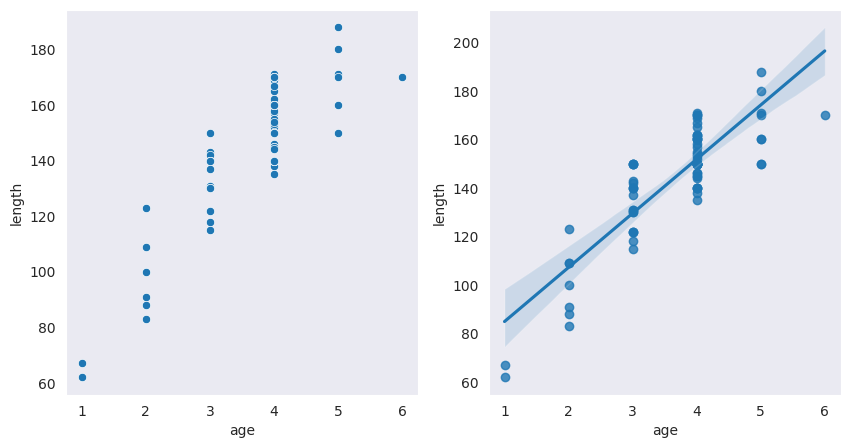

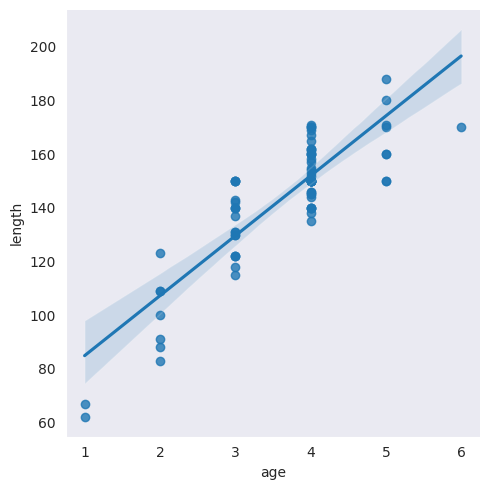

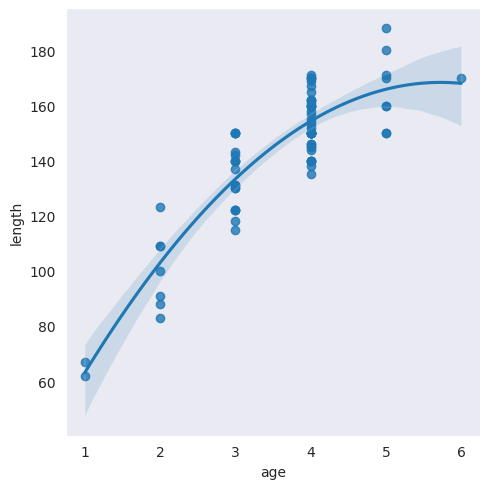

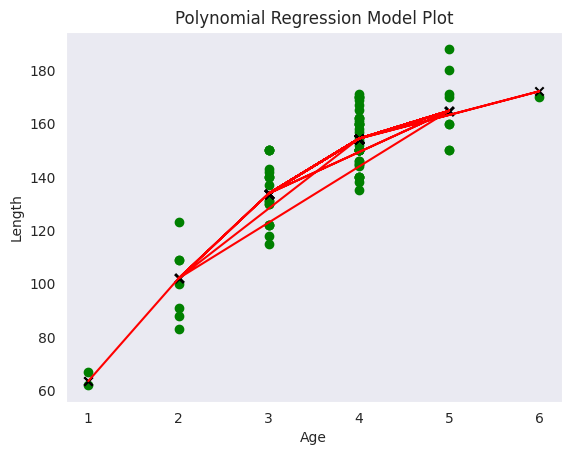

In [32]:
#polynomial regression
#Predict length of fish based on age


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Week 8 Datasets/bluegills.txt', delimiter="\s+")
print(dataset.head())
print("\n")

#Selection of Predictors for the Model
#In this example, we shall choose columns 1 and 2 variables as predictors
#Columns 1 and 2
X = dataset[['age']] #because it is 1-D
X1 = dataset['age']
y = dataset['length']

#Plot graphs
#fig, ax = plt.subplots(1,2, figsize = (10,5))
#sns.scatterplot(data = dataset, x=X, y=y, ax = ax[0])
#sns.regplot(data = dataset, x=X, y=y, ax = ax[1])
#sns.lmplot(x="age", y="length", data=dataset)
#sns.lmplot(x="age", y="length", data=dataset, order = 2) # order = 2 - quadratic
#fig = plt.figure()


#Polynomial Regression Model
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y)

y_pred = model.predict(X_poly)
print(y_pred)
print("\n")

#Model Summary
reg_label = "Coefficients:%s - b:%0.2f" % \
            (np.array2string(model.coef_,
                             formatter={'float_kind': lambda fk: "%.3f" % fk}),
            model.intercept_)
print(reg_label)
print("\n")
print("The model coefficients are: for degree 4 - x^0, x^1, x^2, x^3, X^4 ")
print(model.coef_)
print("The model intercepts are ", model.intercept_)
print("\n")

#Visualise Pre Polynomial Regression Graphs
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.scatterplot(data=dataset, x = "age", y = "length", ax = ax[0])
sns.regplot(data = dataset, x = "age", y = "length", ax = ax[1])
sns.lmplot(x="age", y="length", data=dataset)
sns.lmplot(x="age", y="length", data=dataset, order = 2) # order = 2 - quadratic

#Visualise Polynomial Regression Graphs
fig1, ax1 = plt.subplots()
ax1.scatter(X1,y, color = 'green')
ax1.plot(X1, y_pred, color = 'red')
ax1.scatter(X1, y_pred, color = 'black', marker = 'x')
ax1.set_title("Polynomial Regression Model Plot")
ax1.set_xlabel("Age")
ax1.set_ylabel("Length")

#Use Statsmodel
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='length ~ age + age^2 + age^3 + age^4', data=dataset).fit()

# print the coefficients using statsmodel
print("Coefficients using statsmodel")
print(lm1.params)
print("\n")


#Print coefficients using scikit-LEarn
#Look at model symmary above
print("Coefficients using SK-Learn Polynomial Regression Model ")
print("The model coefficients are: for degree 4 - x^0, x^1, x^2, x^3, X^4 ")
print(model.coef_)
print("The model intercepts are ", model.intercept_)
print("Compare the results of statsmodel and sk-learn for polynomial regression model")
print("\n")

#Model Evaluation
# calculate MAE, MSE, RMSE
print('Mean Absolute Error, MAE is ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error, MSE is ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Square Error is ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("\n")

#Rsquared value of model
print("Coefficient of determination or R squared value is ")
print(r2_score(y, y_pred))
print("\n")


Polynomial regression is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables. Dataset is from https://online.stat.psu.edu/stat501/lesson/9/9.8

Bluegills are fish randomly sampled in Lake Mary, Minnesota. It has 2 columns, age (predictor) and length (target) of the bluegills. We shall use the bluegills.txt dataset.

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


X test :
         crim  lstat
173   0.09178   9.04
274   0.05644   3.53
491   0.10574  18.07
72    0.09164   5.52
452   5.09017  17.27
76    0.10153  11.97
316   0.31827  18.33
140   0.29090  24.16
471   4.03841  12.87
500   0.22438  14.33
218   0.11069  17.92
9     0.17004  17.10
414  45.74610  36.98
78    0.05646  12.34
323   0.28392  11.74
473   4.64689  11.66
1

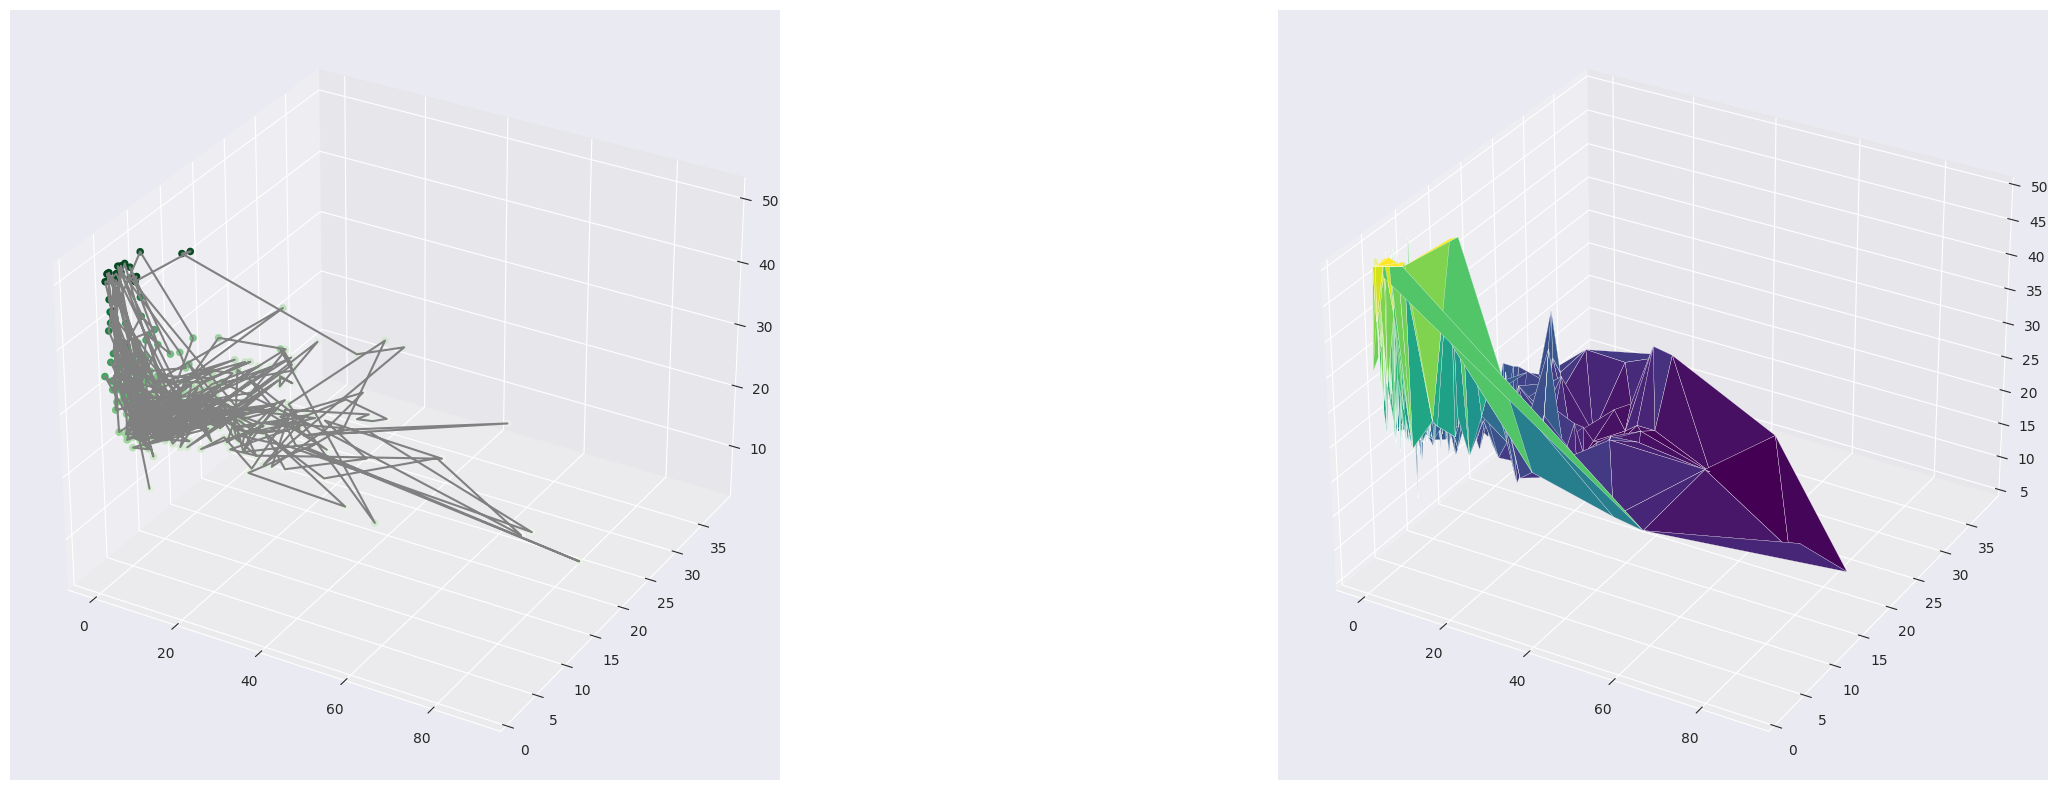

Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  0.5468422164278394


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  0.671021434201695


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  0.3266098283225235


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  0.6077114466139055


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  0.39720358289887636


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -3.884466757937857


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -4033.3886341954126




Text(0, 0.5, 'Predicted MEDV')

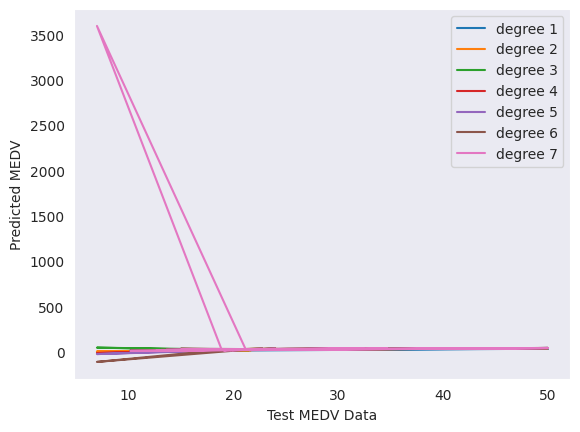

In [34]:
#Multivariate Polynomial Regression
#Use the crim and lstat predictors tp predict the median value of homes.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d


# Load the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Week 8 Datasets/boston.txt', delimiter=",")

print(dataset.head())
print("\n")

#Selection of Predictors for the Model
#In this example, we shall choose several columns as predictors
#Columns 0 and 13 as predictors
#Column 14 as the target variable
X = dataset[['crim', 'lstat']]
X1 = dataset['crim']
X2 = dataset['lstat']
y = dataset['medv']


#Split Dataset to Train and Test Dataset
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42)
X11 = x_test['crim']
X12 = x_test['lstat']
print('X test :')
print(x_test)
print("\n")
print('X test crim :')
print(X11)
print("\n")
print('X test lstat :')
print(X12)
print("\n")

#Train and Fit the model with nth degree
#https://acadgild.com/blog/polynomial-regression-understand-power-of-polynomials

#Plot x test and y test - 3D plot
#https://scipy-lectures.org/packages/statistics/auto_examples/plot_regression_3d.html
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(1,2,1, projection = '3d')
ax.scatter3D(X1, X2, y, c=y, cmap='Greens')
ax.plot3D(X1, X2, y, 'gray')

#Second subplot
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(X1, X2, y, cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')


#Build the model
ax = fig.add_subplot(2, 2, 1, projection='3d')
for degree in [1,2,3,4,5,6,7]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Return the coefficient of determination R^2 of the prediction, i.e. the model score is: ",model.score(x_test, y_test))
    print("\n")
    plt.plot(y_test, y_pred, label="degree %d" % degree)
    plt.legend(loc='upper right')
plt.xlabel("Test MEDV Data")
plt.ylabel("Predicted MEDV")


